[Презентация](https://drive.google.com/file/d/1fto0wf6p8eq5G0PlRxjEfsJjuWyvSdN2/view?usp=sharing)

[Дашборд](https://public.tableau.com/views/Dash_bank_16895912547900/sheet1?:language=en-US&:display_count=n&:origin=viz_share_link)

# Анализ оттока клиентов

В нашем распоряжении файл `bank_scrooge.csv`, содержащий информацию о клиентах регионального банка.

Необходимо проанализировать клиентов банка и выделить сегменты клиентов, которые склонны уходить из банка.

Описание данных
файла `bank_scrooge.csv`:
- `userid` — идентификатор пользователя;
- `score` — баллы кредитного скоринга;
- `city` - город;
- `gender` - пол;
- `age` - возраст;
- `equity` - количество баллов собственности;
- `balance` - баланс на счёте;
- `products` - количество продуктов, которыми пользуется клиент;
- `credit_card` - есть ли кредитная карта (1 - есть, 0 - нет);
- `last_activity` - активный клиент (1 - активный, 0 - не активный);
- `estimated_salary` - заработная плата клиента;
- `churn` - ушел или нет (1 - ушел, 0 - нет).


**Ход исследования**

О качестве данных ничего неизвестно, поэтому, перед тем как перейти к исследованию, необходимо будет провести обзор данных.

Проведем обзор данных и поищем возможность исправить ошибки, которые могут привести к искажению конечных результатов. Проведем исследовательский анализ и проверку гипотез. В конце дадим рекомендации, оформим результаты в презентации и сделаем дашборд.

Таким образом, наше исследование пройдет в 10 этапов:

- Обзор данных;
- Предобработка данных;
- Анализ отточности клиентов по параметрам;
- Корреляционный анализ;
- Проверка гипотез;
- Сегментация;
- Общий вывод;
- Рекомендации;
- Подготовка презентации;
- Дашборд.

## Загрузка и первичный осмотр данных.

### Загрузка данных из файла в датафрейм.

In [1]:
#импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
import phik

In [2]:
#чтение файла и сохранение в data

data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

### Изучение общей информации о полученном датафрейме.

In [3]:
#первые 5 строк

data.head(5)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
#общая информация о данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
#взглянем на максимальные, минимальные, средние и медианные значения

data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


**Вывод:** при первичном осмотре мы видим, что нескольким столбцам необходимо редактировать наименование, есть пропуски, можно изменить тип данных столбца возвраста. Приступим к предобработке.

## Предобработка данных.

### Наименование колонок.

In [6]:
#поменяем названия на более удобное и стилистически правильное

data = data.rename(columns={'USERID':'user_id', 'EST_SALARY':'salary'})
data.head(1)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1


### Пропущенные значения.

In [7]:
# определим количество пропущенных значений

data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
salary              0
churn               0
dtype: int64

In [8]:
# посмотрим на количество пропусков в %

pd.DataFrame(round(data.isna().mean()*100,2)).style.background_gradient('coolwarm') # посмотрим процентное соотношение

,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.260000
equity,0.000000
balance,22.950000
products,0.000000
credit_card,0.000000
last_activity,0.000000


Как мы видели ранее, есть пропуски в столбцах с балансом и возрастом. Пропуски в балансе оставим и никак заполнять не будем, к сожалению, у нас нет данных о имеющихся банковских продуктах, возможно, какие-то продукты не подразумевают наличие баланса на счете, например это может быть страхование или кредитный счет, на который, в день погашения очередного платежа, происходит зачисление с дебетового счета(автоплатеж). Может быть баланс указан только у владельцев дебетовой карты. Какие-то закономерности сложно отследить - города разные, значения количества продуктов и наличия кредитной карты тоже. Заполнять значения средним в такой ситуации будет некорректно.

В столбце возраста удалим строки с пропусками, их немного.

In [9]:
# удаляем пропуски

data = data.dropna(subset=['age']) 

### Типы данных.

In [10]:
#меняем тип данных

data['age'] = data['age'].astype('int8')
data.dtypes

user_id            int64
score            float64
city              object
gender            object
age                 int8
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
salary           float64
churn              int64
dtype: object

### Явные и неявные дубликаты.

In [11]:
#посмотрим на количество дубликатов

data.duplicated().sum()

0

Явных дубликатов не наблюдаем. Посмотрим, есть ли дубликаты в столбце `user_id`

In [12]:
print('Количество уникальных значений в столбце user_id:', data['user_id'].nunique())

Количество уникальных значений в столбце user_id: 9924


Следовательно, есть 50 дубликатов user_id, постараемся выяснить природу их возникновения и далее решим, что с ними делать.

In [13]:
#отберем те id, которые встречаются в датафрейме более 1 раза.

dupl = (
    data['user_id'].value_counts()
    .reset_index()
    .query('user_id > 1') 
)


#создадим из них список


dupl = dupl['index'].tolist() 


#сохраним датафрейм, состоящий только из id дубликатов
#и отсортируем, чтобы id в таблице были рядом


dupl = (
    data
    .query('user_id==@dupl')
    .sort_values('user_id',ascending=False) 
)


#глянем на первые 15 пар дубликатов, постараемся найти какие-то особенности.

dupl.head(30)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
8497,227795,839.0,Ярославль,М,34,2,326593.14,2,1,0,103314.92,0
8205,227795,840.0,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1
4216,226719,903.0,Рыбинск,Ж,63,0,NaN,1,1,0,138582.58,0
2597,226719,990.0,Ярославль,М,37,4,14648692.14,2,0,0,934412.61,1
2302,220816,934.0,Рыбинск,Ж,74,5,1294285.39,3,1,0,95606.80,0
1740,220816,840.0,Ярославль,Ж,41,3,1193287.13,2,1,1,76434.94,1
9406,217826,790.0,Рыбинск,Ж,46,4,430414.80,2,1,1,49400.37,0
4623,217826,842.0,Ярославль,М,39,4,439747.65,2,0,1,116736.75,1
1970,217643,845.0,Ярославль,М,29,5,733098.45,4,1,1,41443.01,1
4186,217643,804.0,Рыбинск,Ж,40,2,301836.65,2,1,1,81137.22,0


Мы видим, что каждая пара дубликатов состоит из двух городов Ярославль и Рыбинск. Среди этих пар есть особенность - один из контрагентов ушел из банка. Можно предположить, что после ухода клиента из банка, его id может быть присвоен другому - новоприбывшему.

Таким образом, однозначно установить причину не представляется возможным (не забываем еще про вероятность технической ошибки). Исходя из того, теория имеет место быть, удалять дубликаты не будем, их не так много.

### Аномальные значения.

еще раз посмотри на фрейм методом `describe()`

In [14]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,salary,churn
count,9974.000000,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374
std,33695.527126,65.399720,12.179971,1.979965,1.980327e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525166e+04,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000
75%,201163.750000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Пройдемся по каждому пункту и заодно ближе познакомимся со структурой:
   * минимальное и максимальное значение кредитного скоринга - 642 и 1000. Вероятно это внутренняя система оценки клиентов банка, т.к. системы оценки бывают разные, например 0-100, 1-999. В нашем случае, видимо, 1-1000;
   * максимальный возраст - 86 лет. Контрагент может быть держателем сбережений, или например, получать на карту какие-то пособия;
   * шкала оценки баллов собственности 0-9;
   * максимальный баланс - 119 млн. Сумма большая, но вполне может быть реальным значением;
   * количество продуктов - от 0 до 5;
   * зарплаты - от 2,5 тыс. до 1,4 млн. Значения также могут быть реальными.

Можно было бы убрать 1% аномальных значений по столбцу с зарплатой, но, разделив фрейм на ушедших и оставшихся, я заметил, что соотношение данных до и после очистки особо не поменяется и таким образом не повлияет на исследование. Решено было не отделять аномалии.

**Вывод:**

* переименовали несколько столбцов;
* проанализировали пропуски, заполнили пропуски в столбце с возрастом;
* изменили тип данных столбца с возрастом;
* нашли и проанализировали 73 дубликата столбца `user_id`.
* взглянули на выбросы по всем параметрам. Решено было не удалять выбросы.

## Исследовательский анализ данных.

### Доля оттока.

Для начала разделим фрейм на оставшихся и ушедших и посмотрим долю клиентов, ушедших из банка.

In [15]:
#остались

stayed = data.query('churn==0')

#ушли

gone = data.query('churn==1')

#найдем долю


share = len(gone)/len(data)

print('Доля клиентов, ушедших из банка: {0:.1%}'.format(share))
print()
print('В натуральных единицах, количество ушедших клиентов:', len(gone))

Доля клиентов, ушедших из банка: 18.2%

В натуральных единицах, количество ушедших клиентов: 1819


Проанализируем данные по каждому столбцу, визуализируем анализ с помощью нормализованных гистограмм плотностей.

### Скоринг

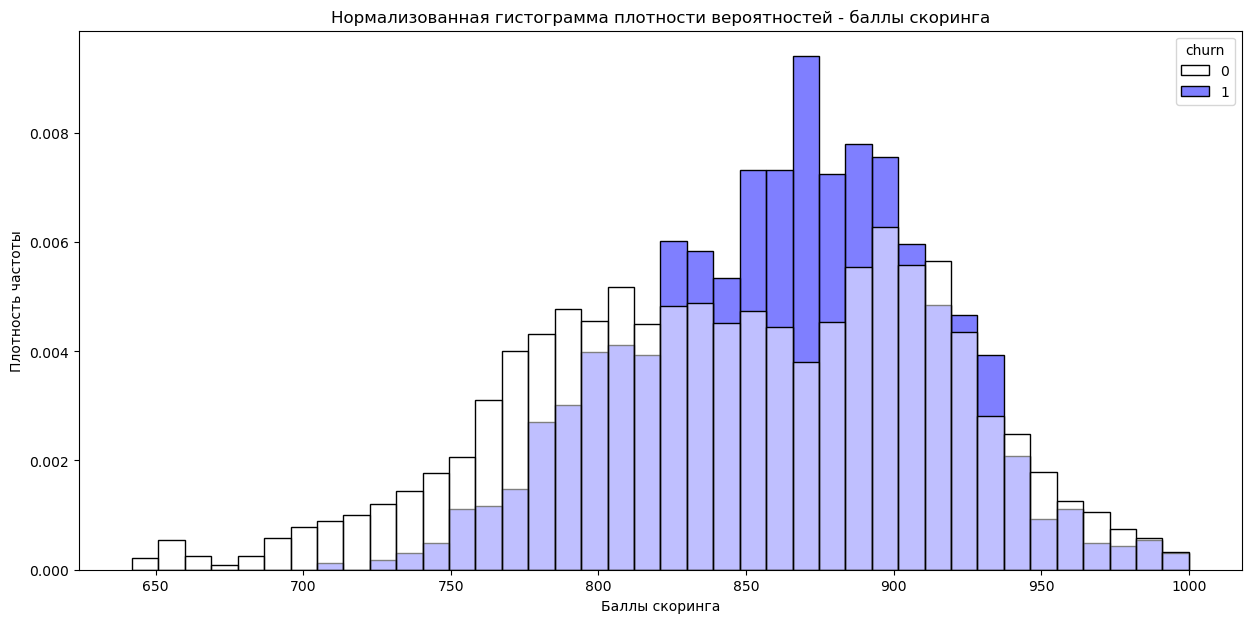

In [16]:
plt.rcParams['figure.figsize']=15,7
ax = sns.histplot(data=data, x="score", hue="churn", stat = "density", common_norm =False, palette='flag')
ax.set(xlabel="Баллы скоринга", ylabel = "Плотность частоты",title = "Нормализованная гистограмма плотности вероятностей - баллы скоринга")
plt.show()

Клиенты, имеющие от 820 до 900 баллов скоринга уходят из банка чаще. Можно также выделить небольшую зону с 920-930.

### Город

Посмотрим, какие города представлены в фрейме и как распределены доли.

In [17]:
city = data.groupby('city')['user_id'].agg(count=('count')).sort_values('count', ascending=False).reset_index()
city['share, %'] = round(city['count']/len(data)*100,1)
city

,city,count,"share, %"
0,Ярославль,5875,58.9
1,Рыбинск,2683,26.9
2,Ростов,1416,14.2


И распределение в оттоке.

In [18]:
city_gone = gone.groupby('city')['user_id'].agg(count=('count')).sort_values('count', ascending=False).reset_index()
city_gone['share, %'] = round(city_gone['count']/len(gone)*100,1)
city_gone

,city,count,"share, %"
0,Ярославль,1117,61.4
1,Рыбинск,437,24.0
2,Ростов,265,14.6


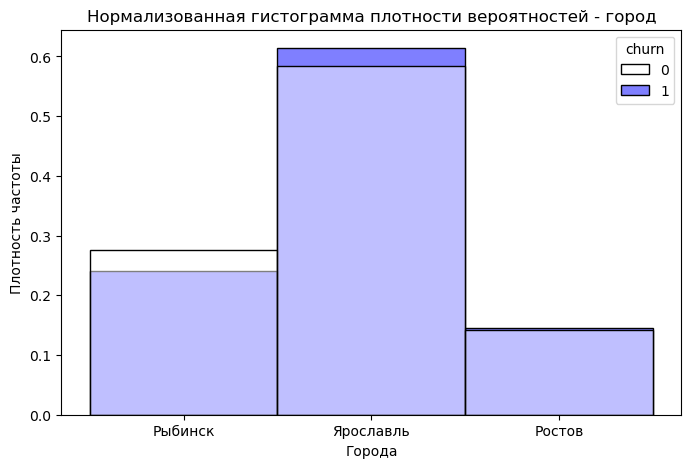

In [19]:
plt.rcParams['figure.figsize']=8,5
ax = sns.histplot(data=data, x="city", hue="churn", stat = "density", common_norm =False, palette='flag')
ax.set(xlabel="Города", ylabel = "Плотность частоты",title = "Нормализованная гистограмма плотности вероятностей - город")
plt.show()

В датафрейме представлены данные о клиентах из трех городов: Ярославль, Рыбинск и Ростов(Ярославская обл.)

Как мы видим, распределение между клиентами ушедшими и оставшимися приблизительно одинаковое. Больше всего клиентов из Ярославля, отточных клиентов соответственно тоже.

### Пол контрагента

In [20]:
gender = data.groupby('gender')['user_id'].agg(count=('count')).sort_values('count', ascending=False).reset_index()
gender['share, %'] = round(gender['count']/len(data)*100,1)
gender

,gender,count,"share, %"
0,М,4991,50.0
1,Ж,4983,50.0


Распределение по гендеру одинаковое

Посмотрим распределение в оттоке.

In [21]:
gender_gone = gone.groupby('gender')['user_id'].agg(count=('count')).sort_values('count', ascending=False).reset_index()
gender_gone['share, %'] = round(gender_gone['count']/len(gone)*100,1)
gender_gone

,gender,count,"share, %"
0,М,1183,65.0
1,Ж,636,35.0


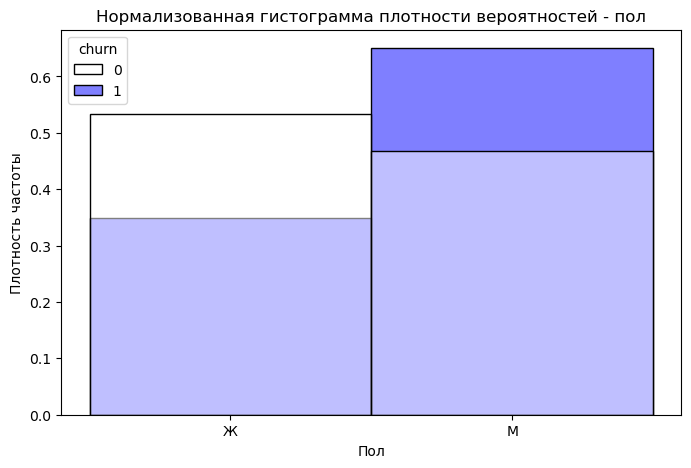

In [22]:
plt.rcParams['figure.figsize']=8,5
ax = sns.histplot(data=data, x="gender", hue="churn", stat = "density", common_norm =False, palette='flag')
ax.set(xlabel="Пол", ylabel = "Плотность частоты",title = "Нормализованная гистограмма плотности вероятностей - пол")
plt.show()

Распределение мужчин и женщин в датафрейме одинаковое, однако, в разрезе оттока мы видим, что среди клиентов мужского пола большее количество ушедших.

### Возраст

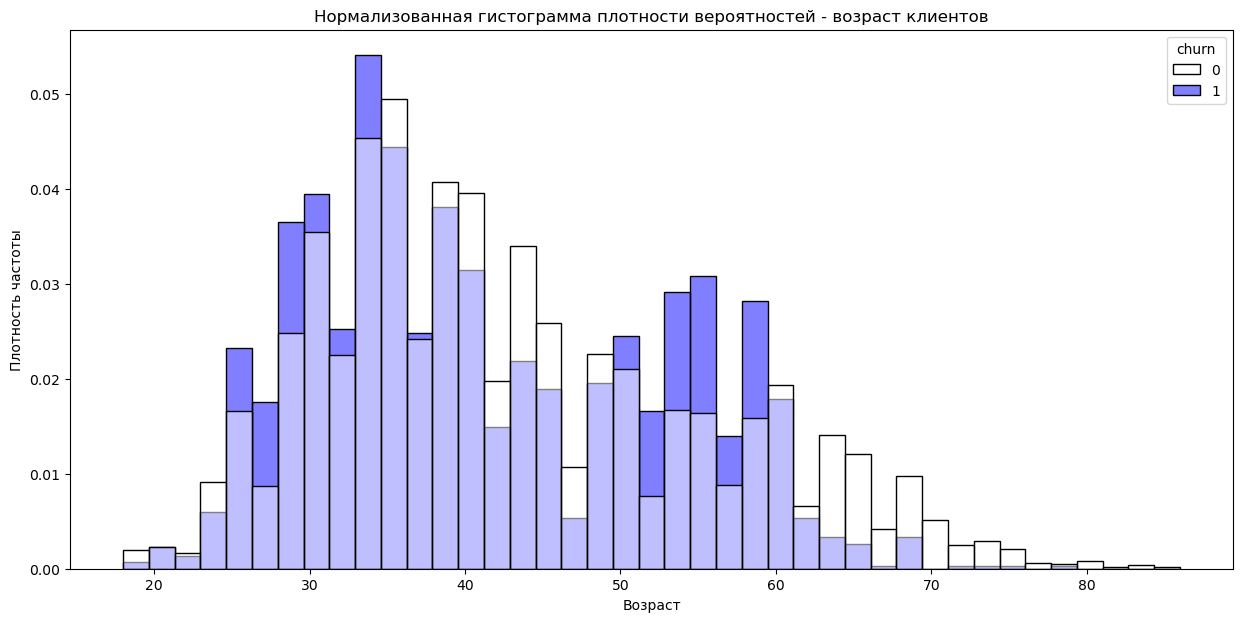

In [23]:
plt.rcParams['figure.figsize']=15,7
ax = sns.histplot(data=data, x="age", hue="churn", stat = "density", common_norm =False, palette='flag')
ax.set(xlabel="Возраст", ylabel = "Плотность частоты",title = "Нормализованная гистограмма плотности вероятностей - возраст клиентов")
plt.show()

Мы видим, что чаще всего банк покидали клиенты двух возрастных категорий: ~23-36 и ~50-60 лет.

### Баллы собственности

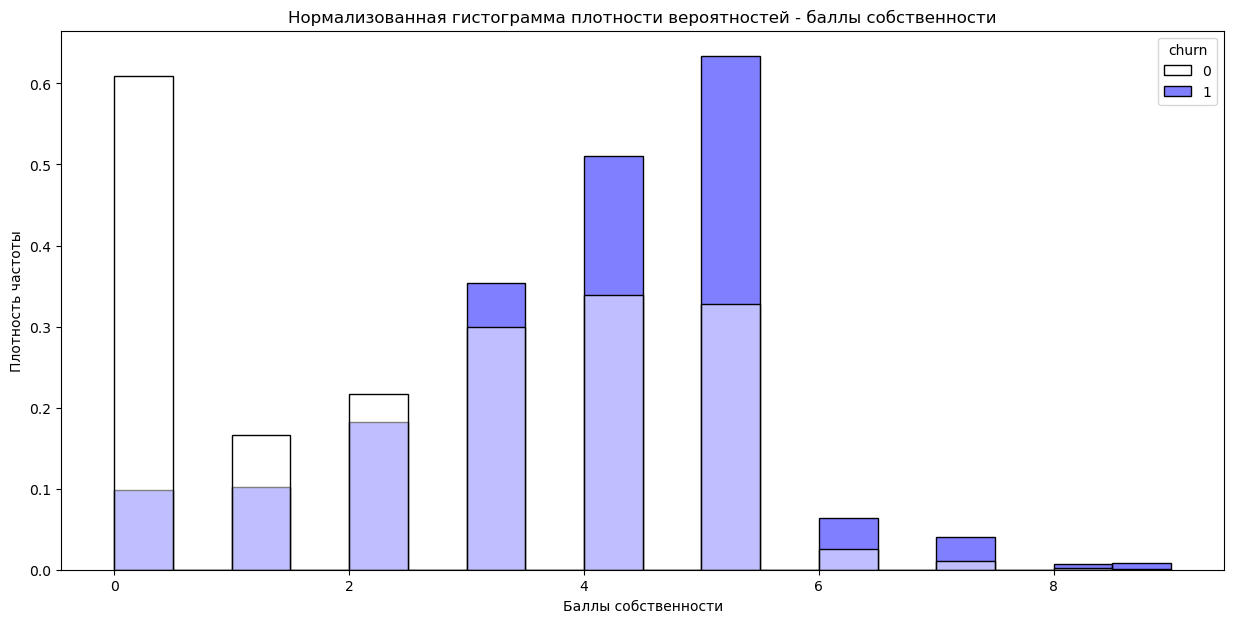

In [24]:
ax = sns.histplot(data=data, x="equity", hue="churn", stat = "density", common_norm =False, palette='flag', binwidth= 0.5)
ax.set(xlabel="Баллы собственности", ylabel = "Плотность частоты",title = "Нормализованная гистограмма плотности вероятностей - баллы собственности")
plt.show()

Банк покидают клиенты, имеющие, как правило, 3 и более баллов собственности.

### Баланс

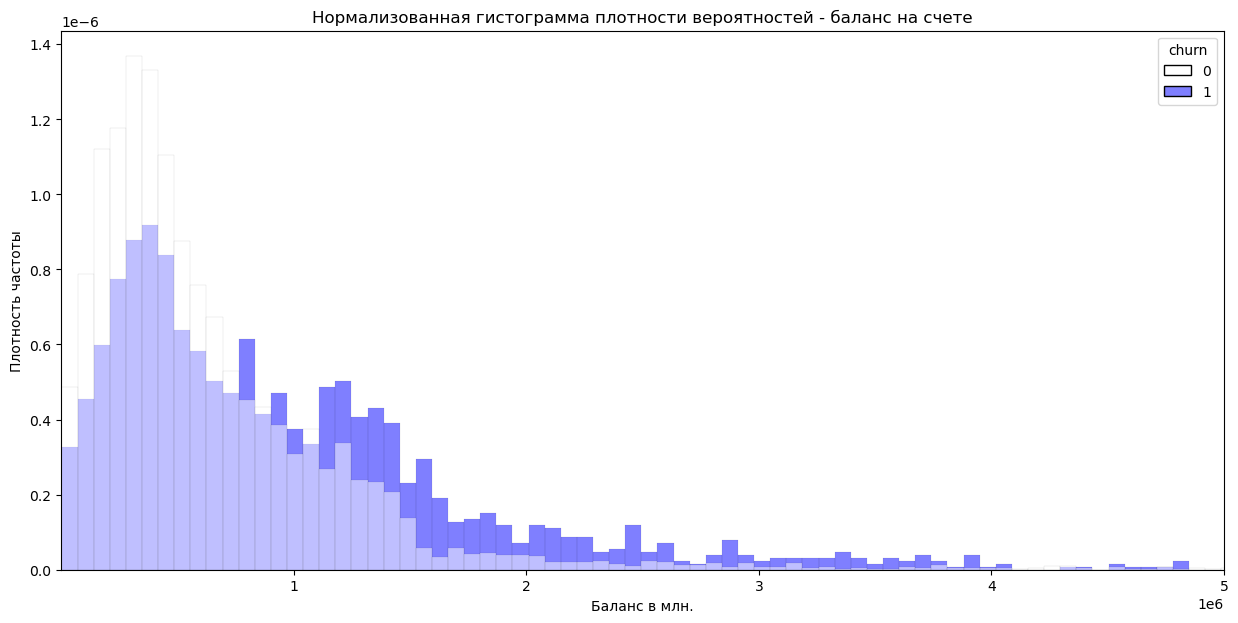

In [25]:
ax = sns.histplot(data=data, x="balance", hue="churn", stat = "density", common_norm =False, palette='flag')
ax.set_xlim(1, 5000000)
ax.set(xlabel="Баланс в млн.", ylabel = "Плотность частоты",title = "Нормализованная гистограмма плотности вероятностей - баланс на счете")
plt.show()

К оттоку склонны клиенты, имеющие на своих счетах внушительные суммы (приближаясь к миллиону и далее).

### Количество банковских продуктов

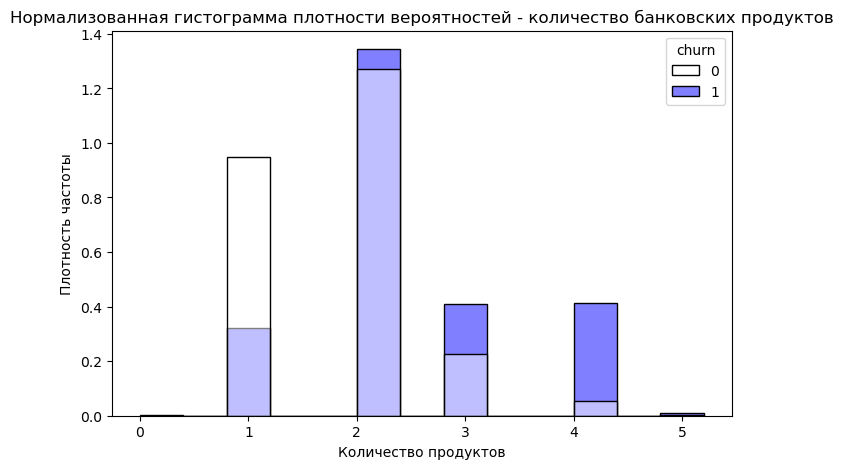

In [26]:
plt.rcParams['figure.figsize']=8,5
ax = sns.histplot(data=data, x="products", hue="churn", stat = "density", common_norm =False, palette='flag', binwidth= 0.4)
ax.set(xlabel="Количество продуктов", ylabel = "Плотность частоты",title = "Нормализованная гистограмма плотности вероятностей - количество банковских продуктов")
plt.show()

Количество продуктов также является значимым критерием, особенно это заметно среди клиентов, имеющих от 3-х продуктов.

### Кредитная карта

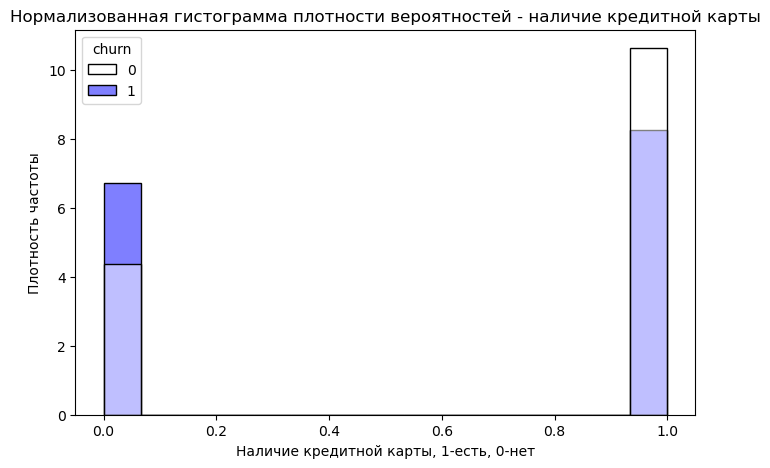

In [27]:
plt.rcParams['figure.figsize']=8,5
ax = sns.histplot(data=data, x="credit_card", hue="churn", stat = "density", common_norm =False, palette='flag')
ax.set(xlabel="Наличие кредитной карты, 1-есть, 0-нет", ylabel = "Плотность частоты",title = "Нормализованная гистограмма плотности вероятностей - наличие кредитной карты")
plt.show()

Наличие кредитной карты имеет меньшее значение - чаще уходят клиенты, не имеющие кредиток.

### Активность клиента

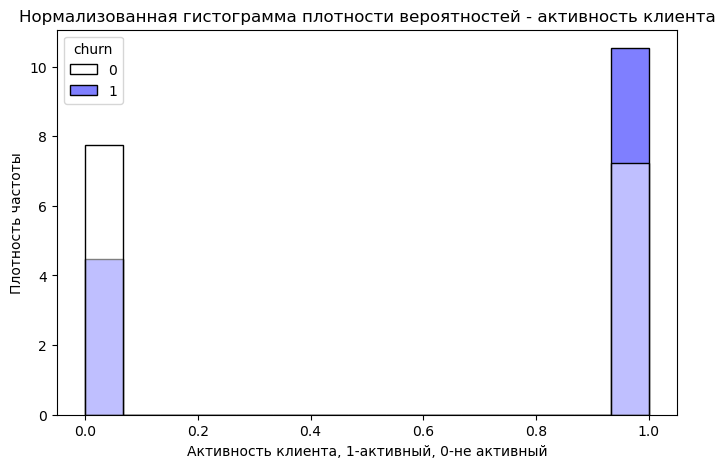

In [28]:
plt.rcParams['figure.figsize']=8,5
ax = sns.histplot(data=data, x="last_activity", hue="churn", stat = "density", common_norm =False, palette='flag')
ax.set(xlabel="Активность клиента, 1-активный, 0-не активный", ylabel = "Плотность частоты",title = "Нормализованная гистограмма плотности вероятностей - активность клиента")
plt.show()

Чаще уходят активные клиенты, чем неактивные - это логично, если клиент совсем не пользуется банковскими продуктами, он врядли станет делать лишние шаги и оформлять свой уход из банка официально.

### Заработная плата

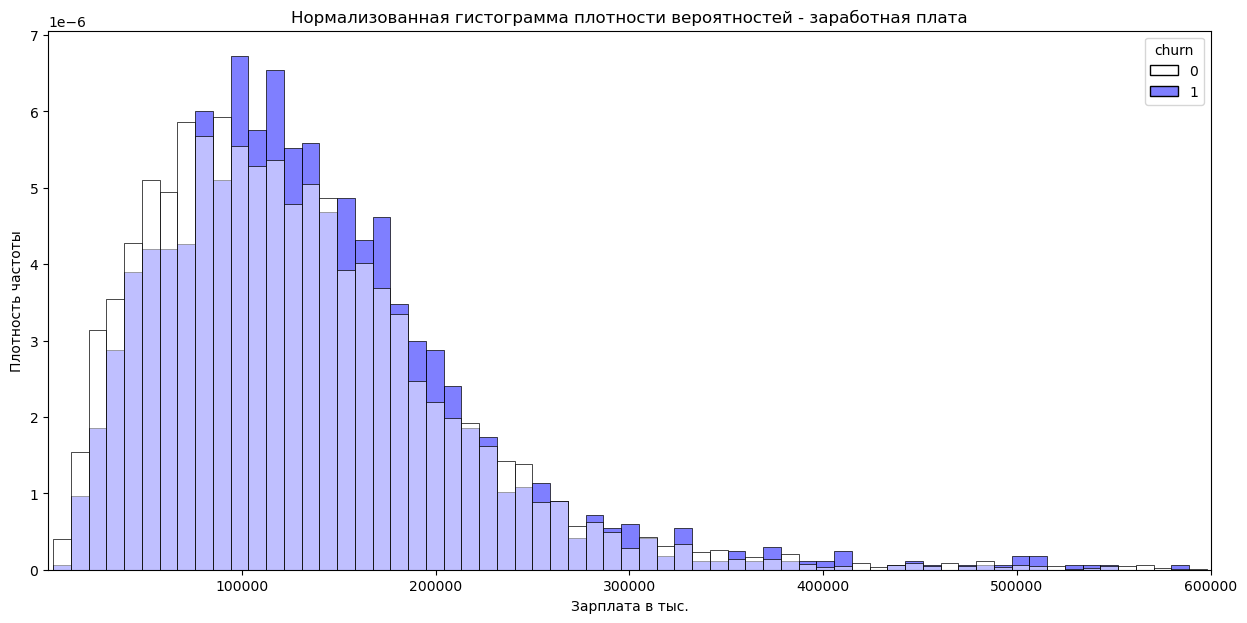

In [29]:
plt.rcParams['figure.figsize']=15,7
ax = sns.histplot(data=data, x="salary", hue="churn", stat = "density", common_norm =False, palette='flag')
ax.set_xlim(1, 600000)
ax.set(xlabel="Зарплата в тыс.", ylabel = "Плотность частоты",title = "Нормализованная гистограмма плотности вероятностей - заработная плата")
plt.show()

Клиенты, имеющие зарплаты ближе к 100тыс. и далее более склонны к оттоку.

**Вывод:**

к оттоку склонны клиенты:
* имеющие от 820 до 900 баллов скоринга;
* мужского пола;
* возвраста ~23-36 и ~50-60 лет;
* имеющие 3 и более баллов собственности;
* с балансом на счете свыше 800тыс.;
* имеющие 3 и более банковских продуктов;
* не имеющие кредитной карты;
* активные;
* получающие зарплаты свыше 80 тыс.

### Корреляция

Посмотрим матрицу корреялции по всему датафрейму.

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'salary', 'churn']


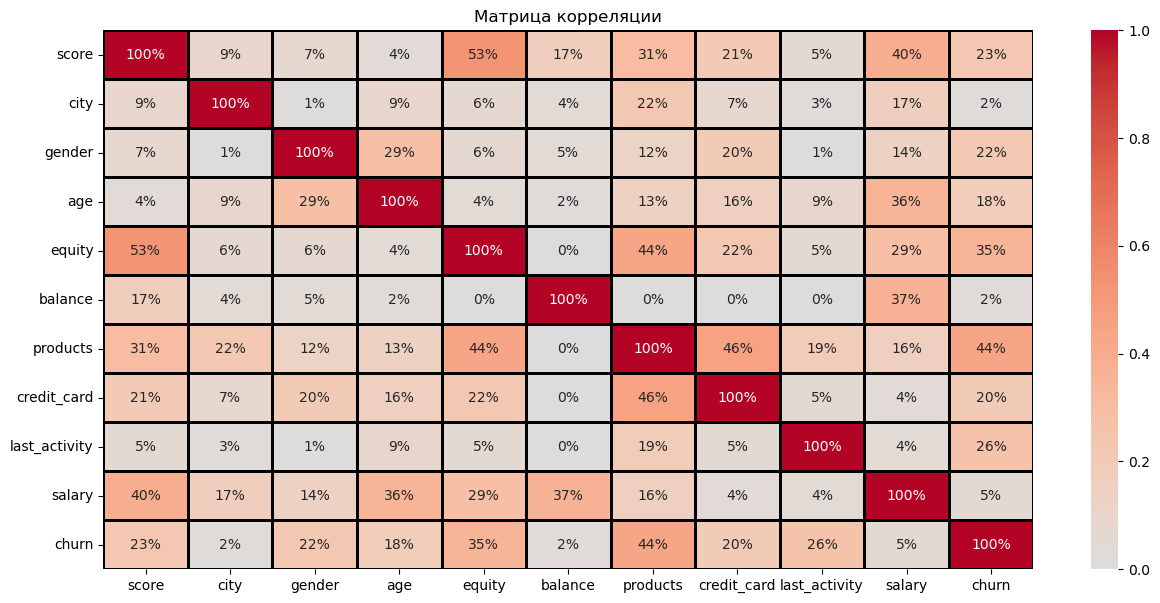

In [30]:
#убираем столбец user_id

data_corr = data.drop('user_id', axis=1) 

plt.rcParams['figure.figsize']=15,7
ax = sns.heatmap(data_corr.phik_matrix(), annot = True, fmt='.0%', center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
ax.set(title = "Матрица корреляции")
plt.show()

Матрица выглядит логично. Например, баланс на счете больше всего зависит от зарплаты, а наличие кредитной карты от количества продуктов. Для себя можем отметить также, что на значение баллов скоринга влияет зарплата, наличие имущества и количество продуктов.

Выведем отдельным столбцом отток.

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'salary', 'churn']


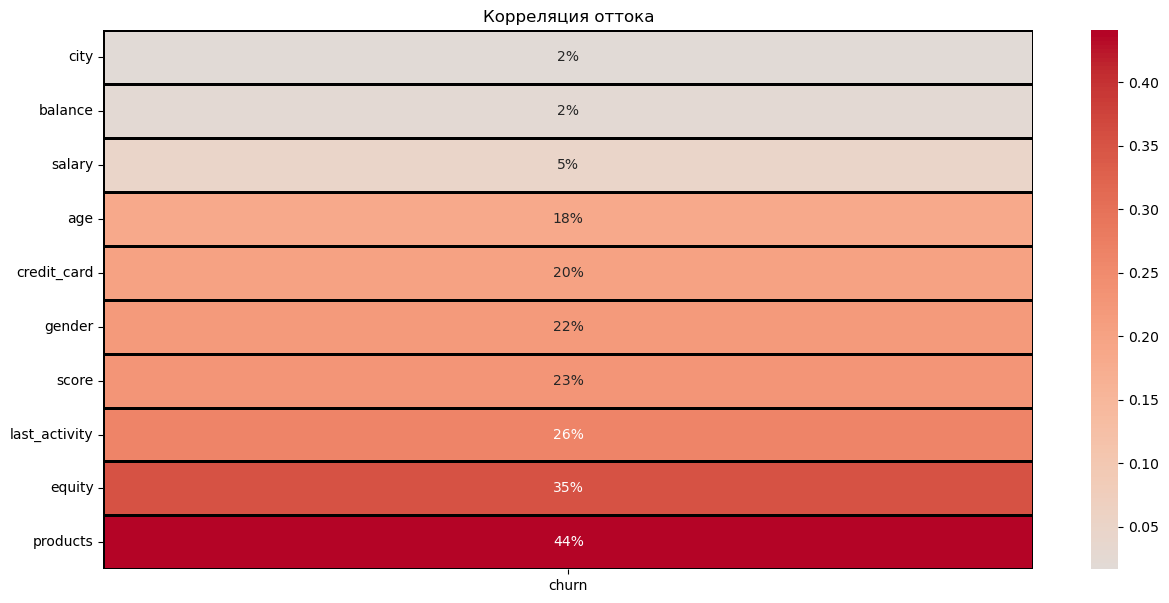

In [31]:
ax = sns.heatmap(data_corr.phik_matrix().loc[:,['churn']].drop('churn').sort_values('churn'),
            annot=True, fmt='.0%',cmap='coolwarm',center=0, linewidths=1, linecolor='black')
ax.set(title = "Корреляция оттока")
plt.show()

**Вывод:** отдельно по столбцу оттока мы видим влияние тех или иных параметров. Наиболее значимым оказался параметр количества продуктов, следом идет параметр баллов имущества, ну и конечно, клиент активный.

## Проверка гипотез

Проверять гипотезы будем при помощи t-теста.
Проверим, равны ли средние значения двух генеральных совокупностей выборок. Использовать будем функцию ttest_ind библиотеки scipy.

В параметре equal_var укажем значение False, т.к. выборки не равны между собой по размеру.

Создадим функцию для проверки гипотез, ведь у нас их будет четыре.

In [32]:
def pvalue_stat (group_a, group_b): 
    """
    
    Функция для проверки статистических гипотез
    
    """
    alpha = 0.5
    results = st.ttest_ind(group_a, group_b, equal_var=False)
    print('pvalue:', results.pvalue)
    if results.pvalue < alpha:
          print('Отвергаем нулевую гипотезу')
    else:
          print('Не получилось отвергнуть нулевую гипотезу')
    print('Относительная разница средних значений:{0:.2%}'.format(group_b.mean() / group_a.mean() - 1))

### Доход

Сформулируем основную статистическую гипотезу и альтернативную:

* H_0: различий дохода между теми клиентами которые остались и теми, которые ушли нет
* H_1: различия дохода между теми клиентами которые остались и теми, которые ушли есть

In [33]:
pvalue_stat(stayed['salary'].dropna(), gone['salary'].dropna())

pvalue: 0.8515799588935961
Не получилось отвергнуть нулевую гипотезу
Относительная разница средних значений:0.42%


### Активность

Сформулируем основную статистическую гипотезу и альтернативную:

* H_0: различий параметра активности между теми клиентами которые остались и теми, которые ушли нет
* H_1: различия параметра активности между теми клиентами которые остались и теми, которые ушли есть

In [34]:
pvalue_stat(stayed['last_activity'].dropna(), gone['last_activity'].dropna())

pvalue: 8.100190763155924e-70
Отвергаем нулевую гипотезу
Относительная разница средних значений:45.38%


### Скорринг

Сформулируем основную статистическую гипотезу и альтернативную:

* H_0: различий баллов кредитного скоринга между теми клиентами которые остались и теми, которые ушли нет
* H_1: различия баллов кредитного скоринга между теми клиентами которые остались и теми, которые ушли есть

In [35]:
pvalue_stat(stayed['score'].dropna(), gone['score'].dropna())

pvalue: 8.60332714629934e-38
Отвергаем нулевую гипотезу
Относительная разница средних значений:2.13%


### Количество продуктов

Сформулируем основную статистическую гипотезу и альтернативную:

* H_0: различий количества имеющихся банковских продуктов между теми клиентами которые остались и теми, которые ушли нет
* H_1: различия в количестве имеющихся банковских продуктов между теми клиентами которые остались и теми, которые ушли есть

In [36]:
pvalue_stat(stayed['products'].dropna(), gone['products'].dropna())

pvalue: 7.537464337201273e-138
Отвергаем нулевую гипотезу
Относительная разница средних значений:35.08%


**Вывод**: таким образом, мы можем сделать вывод, что различий дохода между теми клиентами которые остались и теми, которые ушли нет. По остальным параметрам (активность клиента, балы скоринга и количество продуктов) различия наблюдаются. При этом, не смотря на то, что относительная разница средних значений скоринга в двух выборках близка к равной, средние значения двух генеральных совокупностей не равны.

## Сегментация

Полагаясь на результаты исследования сделаем срезы и постараемся найти несколько сегментов, более склонных к уходу из банка.

### Сегмент №1

In [37]:
seg_1 = data.query('score >= 860 and equity >=3 and gender=="М" and age > 23 and age <40')
seg_1 = (
    seg_1
    .pivot_table(index='churn', values='user_id', aggfunc='count')
    .rename(columns={'user_id':'count'})
    .reset_index()
)
seg_1['share, %'] = round(seg_1['count']/sum(seg_1['count'])*100,2)

seg_1_share = seg_1['count'][1]/sum(seg_1['count'])

print()
print('Описание сегмента №1:')
print()
print('1. Баллы кредитного скоринга - 860 и выше')
print('2. Баллы собственности - 3 и выше')
print('3. Пол - мужской')
print('4. Возраст от 23 до 40 лет')

print()
print('Количество клиентов в сегменте всего:', (sum(seg_1['count'])))
print()
print('Доля отточных клиентов в сегменте : {0:.1%}'.format(seg_1_share))
print()
print('Что больше от общей доли оттока по банку на {0:.1%}'.format(seg_1_share - share))
      
display(seg_1.style.background_gradient('Reds'))


Описание сегмента №1:

1. Баллы кредитного скоринга - 860 и выше
2. Баллы собственности - 3 и выше
3. Пол - мужской
4. Возраст от 23 до 40 лет

Количество клиентов в сегменте всего: 659

Доля отточных клиентов в сегменте : 55.2%

Что больше от общей доли оттока по банку на 37.0%


,churn,count,"share, %"
0,0,295,44.760000
1,1,364,55.240000


### Сегмент №2

In [38]:
seg_2 = data.query('last_activity == 1 and products >=2 and balance > 1200000')
seg_2 = (
    seg_2
    .pivot_table(index='churn', values='user_id', aggfunc='count')
    .rename(columns={'user_id':'count'})
    .reset_index()
)
seg_2['share, %'] = round(seg_2['count']/sum(seg_2['count'])*100,2)

seg_2_share = seg_2['count'][1]/sum(seg_2['count'])

print()
print('Описание сегмента №2:')
print()
print('1. Активный клиент')
print('2. Имеет 2 банковских продукта и более')
print('3. Баланс свыше 1.2млн.')

print()
print('Количество клиентов в сегменте всего:', (sum(seg_2['count'])))
print()
print('Доля отточных клиентов в сегменте : {0:.1%}'.format(seg_2_share))
print()
print('Что больше от общей доли оттока по банку на {0:.1%}'.format(seg_2_share - share))
      
display(seg_2.style.background_gradient('Reds'))


Описание сегмента №2:

1. Активный клиент
2. Имеет 2 банковских продукта и более
3. Баланс свыше 1.2млн.

Количество клиентов в сегменте всего: 647

Доля отточных клиентов в сегменте : 58.7%

Что больше от общей доли оттока по банку на 40.5%


,churn,count,"share, %"
0,0,267,41.270000
1,1,380,58.730000


### Сегмент №3

In [39]:
seg_3 = data.query('gender =="Ж" and products >=2 and score >=860 and credit_card == 0')
seg_3 = (
    seg_3
    .pivot_table(index='churn', values='user_id', aggfunc='count')
    .rename(columns={'user_id':'count'})
    .reset_index()
)
seg_3['share, %'] = round(seg_3['count']/sum(seg_3['count'])*100,2)

seg_3_share = seg_3['count'][1]/sum(seg_3['count'])

print()
print('Описание сегмента №3:')
print()
print('1. Пол - женский')
print('2. Нет кредитной карты')
print('3. Баллы кредитного скоринга - 860 и выше')
print('4. Количество продуктов - 2 и выше')

print()
print('Количество клиентов в сегменте всего:', (sum(seg_3['count'])))
print()
print('Доля отточных клиентов в сегменте : {0:.1%}'.format(seg_3_share))
print()
print('Что больше от общей доли оттока по банку на {0:.1%}'.format(seg_3_share - share))
      
display(seg_3.style.background_gradient('Reds'))


Описание сегмента №3:

1. Пол - женский
2. Нет кредитной карты
3. Баллы кредитного скоринга - 860 и выше
4. Количество продуктов - 2 и выше

Количество клиентов в сегменте всего: 690

Доля отточных клиентов в сегменте : 30.6%

Что больше от общей доли оттока по банку на 12.3%


,churn,count,"share, %"
0,0,479,69.420000
1,1,211,30.580000


**Вывод:** составлены три сегметных группы, приблизительно равных по размеру. Во всех группах доля отточных клиентов свыше 30%

## Общий вывод

**Нами был проведен анализ оттока клиентов регионального банка, выделим основные моменты:**

* К данным не так много претензий, однако, в работе мы столкнулись с немалым количеством пропусков в столбце с балансом (23%) и некоторым количеством задублированных id.
* По результатам исследовательского анализа выяснили, что к оттоку больше склонны клиенты:
   * имеющие от 820 до 900 баллов скоринга;
   * мужского пола;
   * возвраста ~23-36 и ~50-60 лет;
   * имеющие 3 и более баллов собственности;
   * с балансом на счете свыше 800тыс.;
   * имеющие 3 и более банковских продуктов;
   * не имеющие кредитной карты;
   * активные;
   * получающие зарплаты свыше 80 тыс.
* Наиболее влияющим на отток оказался параметр количества продуктов, следом идет параметр баллов имущества и параметр активности клиента.
* Различий дохода между теми клиентами которые остались и теми, которые ушли нет.
* Выделили три сегмента, более склонных к уходу из банка.


## Рекомендации


**1.** *Проанализировать, почему происходит отток. Можно провести опрос покинувших банк клиентов, например посредством телефонных звонков или электронной почты.*

**2.** *Проинформировать персонал, что при обращении клиента с намерением прекратить отношения с банком, сотрудник также должен постараться выяснить причину ухода, провести работу с возражениями, постараться вернуть лояльность клиента.*

**3.** *Обратить внимание на претензионную работу - каждая претензия это сигнал, что что-то где-то может работать не должным образом.*

**4.** *Выделить самых ценных клиентов для банка и рассмотреть возможность предоставления им дополнительных стимулов и льгот.*

**5.** *Сравнить условия ближайших конкурентов.*




К сожалению, в нашей работе нет разбивки по продуктам, но оттакливаясь от параметров сегментов, могу предположить, что сегмент№1:
* скоринг от 860
* баллы собственности 3 и выше
* мужско пол
* возраст 23-40

это в основном кредитные заемщики, например ипотечные или авто, потому что информация о наличии собственности просто так в банк не предоставляется, ее указывают, в случае выделения какой-то большой суммы или при передаче под залог.

Возможно другие кредиторы предложили лучшие условия по кредитованию.

Что касается сегмента№2:
* активный клиент
* имеет более 2х банковских продуктов
* баланс свыше 1.2млн.

Речь явно может идти о держателях вкладов. Опять же, возможно конкуретны предлагают более приемлимые условия.